In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


In [63]:
filename = "../DATA/HOME_전력거래_연료비용.xlsx"
priceDF = pd.read_excel(filename, header=1, usecols=[0, 11, 12, 13, 14, 15]).drop(0)
priceDF.columns = ["DATE", "NUC", "BIT", "ANTH", "OIL", "LNG"]
priceDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 1 to 277
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    277 non-null    object
 1   NUC     277 non-null    object
 2   BIT     277 non-null    object
 3   ANTH    277 non-null    object
 4   OIL     277 non-null    object
 5   LNG     277 non-null    object
dtypes: object(6)
memory usage: 13.1+ KB


c:\Users\KDP-25\.conda\envs\Torch_NLP38\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [64]:
priceDF = (
    priceDF.astype(
        {
            "NUC": "float64",
            "BIT": "float64",
            "ANTH": "float64",
            "OIL": "float64",
            "LNG": "float64",
        }
    )
    .sort_values("DATE")
    .reset_index(drop=True)
)
priceDF["SUM"] = priceDF.sum(axis=1, numeric_only=True)
priceDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    277 non-null    object 
 1   NUC     277 non-null    float64
 2   BIT     277 non-null    float64
 3   ANTH    277 non-null    float64
 4   OIL     277 non-null    float64
 5   LNG     277 non-null    float64
 6   SUM     277 non-null    float64
dtypes: float64(6), object(1)
memory usage: 15.3+ KB


In [71]:
price_sumDF = priceDF[["SUM"]].iloc[:-13]
price_sum_realDF = priceDF[["SUM"]].iloc[-13:].reset_index(drop=True)
price_sumDF.shape, price_sum_realDF.shape


((264, 1), (13, 1))

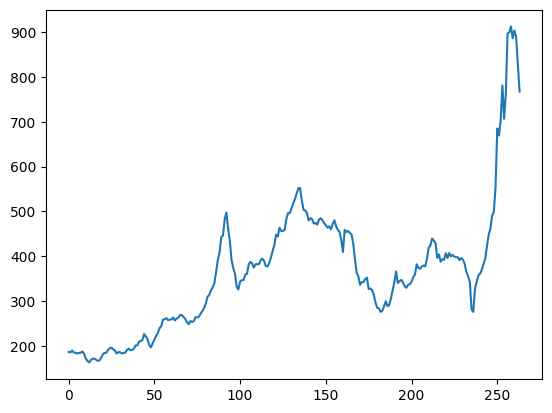

In [66]:
plt.plot(price_sumDF, label="SUM")
plt.show()


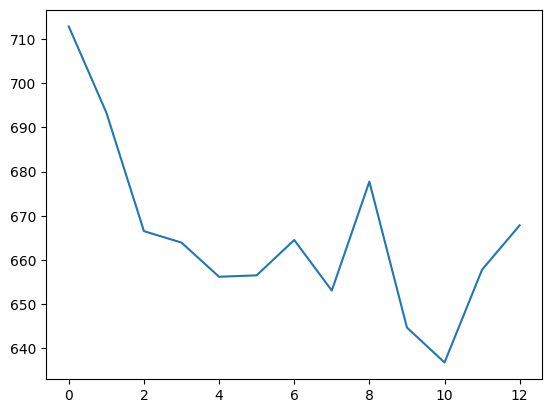

In [67]:
plt.plot(price_sum_realDF, label="SUM_REAL")
plt.show()


In [ ]:
class FuelPriceDataset(Dataset):
    def __init__(self, data):
        data = data if isinstance(data, np.ndarray) else data.values
        self.max_data = np.max(data)
        self.min_data = np.min(data)
        self.data = (data - self.min_data) / (self.max_data - self.min_data)

    def __len__(self):
        return len(self.data) - 3

    def __getitem__(self, i):
        data = self.data[i : i + 3]
        label = self.data[i + 3]


In [78]:
test = (price_sumDF.values - np.max(price_sumDF.values)) / (
    np.min(price_sumDF.values) - np.max(price_sumDF.values)
)


In [83]:
test[0]


array([0.968603])